In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [3]:
df = pd.read_csv('encoded_playlist_songs.csv')
df_fav = pd.read_csv('favorite_songs.csv')

### Preparing data for model

In [4]:
# Remove song name, artist, album
df = pd.concat([df, df_fav], axis=0)
df.shape

(8933, 13)

In [5]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7MAibcTli4IisCtbHKrGMh,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4,0
1,5QO79kh1waicV47BqGRL3g,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4,0
2,1diS6nkxMQc3wwC4G1j0bh,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4,0
3,4u4NyuceXP7Uzh7XFJKCr1,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4,0
4,3Ofmpyhv5UAQ70mENzB277,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,0


In [6]:
df['favorite'].value_counts()

0    8883
1      50
Name: favorite, dtype: int64

# Data Prep Contd, Model Selection & Hyperparameter Tuning

In [7]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

## Creating train & test sets

In [8]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(df))

# Split dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [9]:
train_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
4292,4dlh921u5Ojn59FK2TOC24,148680,32,0.464,0.38800,0.222,0.000000,0.125,-11.977,0.0501,77.133,4,0
3953,0IIn18QlxCeUpLPRaR6a7K,199680,65,0.779,0.56100,0.714,0.012900,0.112,-6.707,0.0949,89.973,4,0
3441,0158TMiGmHyibaDeaUKayX,209253,63,0.635,0.00643,0.758,0.000000,0.229,-5.772,0.0243,113.002,4,0
3945,0rvxWzdAmOr6hzBPyLxFvR,181800,55,0.779,0.03020,0.790,0.000134,0.109,-4.778,0.1110,112.941,4,0
4450,5W3Y5I9y5ps6M6rl09e7zg,521693,54,0.865,0.08320,0.394,0.002310,0.302,-12.235,0.0528,115.936,4,0


In [10]:
X = train_set.drop(columns=['favorite', 'track_id'])
y = train_set.favorite

X.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
4292,148680,32,0.464,0.38800,0.222,0.000000,0.125,-11.977,0.0501,77.133,4
3953,199680,65,0.779,0.56100,0.714,0.012900,0.112,-6.707,0.0949,89.973,4
3441,209253,63,0.635,0.00643,0.758,0.000000,0.229,-5.772,0.0243,113.002,4
3945,181800,55,0.779,0.03020,0.790,0.000134,0.109,-4.778,0.1110,112.941,4
4450,521693,54,0.865,0.08320,0.394,0.002310,0.302,-12.235,0.0528,115.936,4


In [11]:
# Checking for imbalance
y.value_counts()

0    7103
1      43
Name: favorite, dtype: int64

Since the number of favorite songs is so little compared to non-favorite songs, I decided to oversample the favorite class to train a classificaiton model on. 

In [12]:
# Train / Split Data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y) 

In [13]:
X_train.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,148680,32,0.464,0.38800,0.222,0.000000,0.125,-11.977,0.0501,77.133,4
1,199680,65,0.779,0.56100,0.714,0.012900,0.112,-6.707,0.0949,89.973,4
2,209253,63,0.635,0.00643,0.758,0.000000,0.229,-5.772,0.0243,113.002,4
3,181800,55,0.779,0.03020,0.790,0.000134,0.109,-4.778,0.1110,112.941,4
4,521693,54,0.865,0.08320,0.394,0.002310,0.302,-12.235,0.0528,115.936,4


In [14]:
y_train.value_counts()

0    7103
1    7103
Name: favorite, dtype: int64

Now that the classes in the train set are balanced, the model will be less biased towards a song being a non-favorite and be more accurate on the test data and real life application.

In [15]:
test_set.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
5178,7KtbZxJU9ZdIyJJ4QMzx66,598070,42,0.805,0.4590,0.7640,0.937000,0.102,-10.983,0.0796,122.008,4,0
6571,20hVyJfG3arZ4vsuqMKC1V,159866,0,0.316,0.8060,0.4260,0.800000,0.602,-16.993,0.0425,142.291,4,0
8184,04QpMvP7xpRvKKk13I4HRN,714453,0,0.172,0.9740,0.0654,0.939000,0.245,-23.799,0.0477,114.353,4,0
2016,6up6wflOSkh1FWDB7OcUQa,303200,43,0.613,0.0316,0.5010,0.001250,0.115,-10.027,0.0286,115.303,4,0
4344,2GjOk5EmK3njFZPx0aXtm4,175813,42,0.485,0.0539,0.8670,0.000208,0.127,-4.937,0.2240,85.550,4,0


In [16]:
# Setting test datasets
X_test = test_set.drop(columns=['favorite', 'track_id'])
y_test = test_set['favorite']

In [17]:
X_test.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
5178,598070,42,0.805,0.4590,0.7640,0.937000,0.102,-10.983,0.0796,122.008,4
6571,159866,0,0.316,0.8060,0.4260,0.800000,0.602,-16.993,0.0425,142.291,4
8184,714453,0,0.172,0.9740,0.0654,0.939000,0.245,-23.799,0.0477,114.353,4
2016,303200,43,0.613,0.0316,0.5010,0.001250,0.115,-10.027,0.0286,115.303,4
4344,175813,42,0.485,0.0539,0.8670,0.000208,0.127,-4.937,0.2240,85.550,4


In [18]:
y_test.value_counts()

0    1780
1       7
Name: favorite, dtype: int64

## Testing models

In [19]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

0.6360453615017375
Wall time: 713 ms


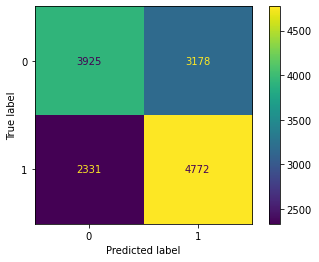

In [20]:
# Logistic Regression confusion matrix
lr_preds = lr.predict(X_train)
plot_confusion_matrix(lr, X_train, y_train)

In [21]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [22]:
%%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

Wall time: 2.61 s


0.980058015524833

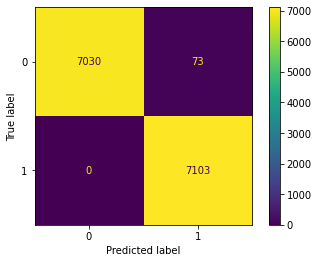

In [23]:
# Decision Tree Classifier confusion matrix
plot_confusion_matrix(dt, X_train, y_train)

In [24]:
%%time
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

Wall time: 27.7 s


{'max_depth': 20, 'n_estimators': 30}

In [25]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

Wall time: 3.38 s


0.9808606297959759

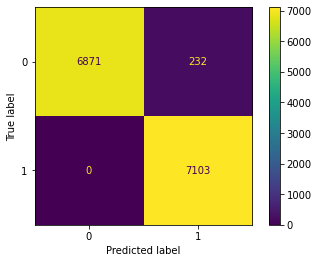

In [26]:
plot_confusion_matrix(rf, X_train, y_train)

### Using algorithm on test data

In [27]:
# Checking for imbalance
y_test.value_counts()

0    1780
1       7
Name: favorite, dtype: int64

In [28]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=30))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

print(pipe.score(X_test, y_test)*100)

97.09009513150532


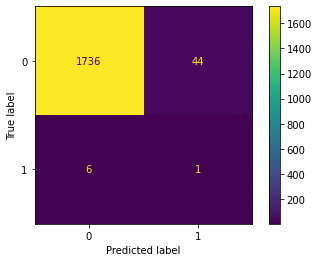

In [29]:
plot_confusion_matrix(dt, X_test, y_test)

## Predicting songs and saving to dataset

In [30]:
# Reloading the original dataframe to test the model on
df = pd.read_csv('encoded_playlist_songs.csv')

In [31]:
df.head()

,track_id,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,favorite
0,7MAibcTli4IisCtbHKrGMh,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4,0
1,5QO79kh1waicV47BqGRL3g,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4,0
2,1diS6nkxMQc3wwC4G1j0bh,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4,0
3,4u4NyuceXP7Uzh7XFJKCr1,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4,0
4,3Ofmpyhv5UAQ70mENzB277,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4,0


In [32]:
# Predicting if a song is a favorite
prob_preds = pipe.predict_proba(df.drop(['favorite','track_id'], axis=1))
threshold = 0.30 # define threshold here
preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
df['prediction'] = preds

In [33]:
df['prediction'].value_counts()

0    8764
1     119
Name: prediction, dtype: int64

## Building the playlist from recommended songs

In [34]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

In [35]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
cid = 'bb34b741629d4173bf4bffa6417a2270'
secret = 'c0c94901909e42e483aac0680375c441'
redirect_uri='http://localhost:7777/callback'
username = 'y1spdovdjdvlieulko3su8e2f'

In [36]:
# Once the Authorisation is complete, we just need to `sp` to call the APIs
scope = 'user-top-read playlist-modify-private playlist-modify-public'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [37]:
# Creating a function that builds a playlist in the user's spotify account
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [38]:
create_playlist(sp, username, 'Project Pllaylist', 'This playlist was created using python!')

In [39]:
# Function to check if the playlist was created successfully
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [40]:
fetch_playlists(sp,username).head()

,id,name,#tracks
0,1KMXMCgYskgF2jYcLnRkMf,Project Pllaylist,0
1,1KgUIRfQMcj7eEGYmbqYa8,YETI Kaun Aur Kahan Se Aate Hai? Sach Jaano! f...,1
2,7flXG8Hk8aRFD68X9G2Wko,The Fight,11


In [41]:
# Getting the playlist ID of the most recently made playlist so we can add songs to it later
playlist_id = fetch_playlists(sp,username)['id'][0]

In [42]:
# Function to add selected songs to playlist
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [43]:
# Adding songs to playlist
list_track = df.loc[df['prediction']  == 1]['track_id']
enrich_playlist(sp, username, playlist_id, list_track)

Now check your Spotify playlists; you'll see a playlist titled 'Your New Jams'. Enjoy!